**Applied Statistics**<br/>
Prof. Dr. Jan Kirenz <br/>
Hochschule der Medien Stuttgart

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot') 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Tidying-data" data-toc-modified-id="Tidying-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tidying data</a></span></li></ul></li><li><span><a href="#Tasks" data-toc-modified-id="Tasks-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tasks</a></span><ul class="toc-item"><li><span><a href="#a1)-Standardization" data-toc-modified-id="a1)-Standardization-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>a1) Standardization</a></span></li><li><span><a href="#a2)-Split-data" data-toc-modified-id="a2)-Split-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>a2) Split data</a></span></li><li><span><a href="#a3)-Lasso" data-toc-modified-id="a3)-Lasso-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>a3) Lasso</a></span></li><li><span><a href="#a4)-Lasso-with-different-lambdas" data-toc-modified-id="a4)-Lasso-with-different-lambdas-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>a4) Lasso with different lambdas</a></span></li><li><span><a href="#a5)-Plot" data-toc-modified-id="a5)-Plot-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>a5) Plot</a></span></li><li><span><a href="#a6)-Identifiy-best-lambda-and-coefficients" data-toc-modified-id="a6)-Identifiy-best-lambda-and-coefficients-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>a6) Identifiy best lambda and coefficients</a></span></li><li><span><a href="#a7)-Cross-Validation" data-toc-modified-id="a7)-Cross-Validation-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>a7) Cross Validation</a></span></li></ul></li></ul></div>

# Lasso Regression

This tutorial involves the use of the Lasso regression on the Auto data set. In particular, we only use **observations 1 to 200** for our analysis. Furthermore, you can drop the `name` variable. 

Lasso performs a so called `L1 regularization` (a process of introducing additional information in order to prevent overfitting), i.e. adds penalty equivalent to absolute value of the magnitude of coefficients.

Minimization objective = RSS + *α*(sum of absolute value of coefficients). 

α (alpha) provides a trade-off between balancing RSS and magnitude of coefficients. 

α can take various values:
  
  - α = 0: Same coefficients as simple linear regression
  - α = ∞: All coefficients zero (same logic as before)
  - 0 < α < ∞: coefficients between 0 and that of simple linear regression
 
 
--- 
 
**Tasks**

Use scikit learn to fit a Lasso regression [(see documentation)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html). 

  - (a1) **Standardize** the features (module: `from sklearn.preprocessing import StandardScaler`)

  
*Hint: It is important to standardize the features by removing the mean and scaling to unit variance. The L1 (Lasso) and L2 (Ridge) regularizers of linear models assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.*
      

  - (a2) **Split the data set** into train and test sets (use `X_train`, `X_test`, `y_train`, `y_test`), with the first 75% of the data for training and the remaining for testing. (module: `from sklearn.model_selection import train_test_split`)
  
  
  - (a3) Apply **Lasso regression** on the training set with the regularization parameter **lambda = 0.5** (module: `from sklearn.linear_model import Lasso`) and print the $R^2$-score for the training and test set. Comment on your findings.
  

  - (a4) Apply the **Lasso regression** on the training set with the following **λ parameters: (0.001, 0.01, 0.1, 0.5, 1, 2, 10)**. Evaluate the R^2 score for all the models you obtain on both the train and test sets. 
  
  
  - (a5) **Plot** all values for both data sets (train and test $R^2$-values) as a function of λ. Comment on your findings.
  
  
  - (a6) Store your test data results in a DataFrame and indentify the lambda where the $R^2$ has it's **maximum value** in the **test data**. Fit a Lasso model with this lambda parameter (use the training data) and obtain the corresponding **regression coefficients**. Furthermore, obtain the **mean squared error** for the test data of this model (module: `from sklearn.metrics import mean_squared_error`)
  
  
  - (a7) Evaluate the performance of a **Lasso regression** for different regularization parameters λ using **5-fold cross validation** on the training set (module: `from sklearn.model_selection import cross_val_score`) and plot the cross-validation (CV) $R^2$ scores of the training and test data as a function of λ.
  

    Use the following lambda parameters: 
    l_min = 0.05 
    l_max = 0.2
    l_num = 20
    lambdas = np.linspace(l_min,l_max, l_num)


   - (a8) Finally, store your test data results in a DataFrame and indentify the lambda where the $R^2$ has it's **maximum value** in the **test data**. Fit a Lasso model with this lambda parameter (use the training data) and obtain the corresponding **regression coefficients**. Furthermore, obtain the **mean squared error** for the test data of this model (module: `from sklearn.metrics import mean_squared_error`)
   
   
---

## Data preparation

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/Auto.csv")

### Tidying data

In [3]:
df = df.iloc[0:200]
df = df.drop(['name'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
mpg             200 non-null float64
cylinders       200 non-null int64
displacement    200 non-null float64
horsepower      200 non-null object
weight          200 non-null int64
acceleration    200 non-null float64
year            200 non-null int64
origin          200 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 12.6+ KB


In [4]:
df['origin'] = pd.Categorical(df['origin'])
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
year            0
origin          0
dtype: int64


In [5]:
df = df.dropna()

## Tasks

### a1) Standardization

In [6]:
dfs = df.astype('int')

In [7]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 199
Data columns (total 8 columns):
mpg             198 non-null int64
cylinders       198 non-null int64
displacement    198 non-null int64
horsepower      198 non-null int64
weight          198 non-null int64
acceleration    198 non-null int64
year            198 non-null int64
origin          198 non-null int64
dtypes: int64(8)
memory usage: 13.9 KB


In [8]:
dfs.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfs[['cylinders', 'displacement', 'horsepower', 
     'weight', 'acceleration', 'year', 'origin']] = scaler.fit_transform(dfs[['cylinders', 
                                                                              'displacement', 
                                                                              'horsepower', 
                                                                              'weight', 
                                                                              'acceleration', 
                                                                              'year', 'origin']])

/Users/jankirenz/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jankirenz/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [10]:
dfs.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18,1.179744,0.726091,0.325216,0.346138,-0.955578,-1.516818,-0.629372
1,15,1.179744,1.100254,1.129264,0.548389,-1.305309,-1.516818,-0.629372
2,18,1.179744,0.821807,0.784672,0.273370,-1.305309,-1.516818,-0.629372
3,16,1.179744,0.699986,0.784672,0.270160,-0.955578,-1.516818,-0.629372
4,17,1.179744,0.682583,0.554944,0.287282,-1.655041,-1.516818,-0.629372


### a2) Split data

In [11]:
X = dfs.drop(['mpg'], axis=1)
y = dfs['mpg']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

### a3) Lasso

In [13]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=0.5)
reg.fit(X_train, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [14]:
print('Lasso Regression: R^2 score on training set', reg.score(X_train, y_train)*100)
print('Lasso Regression: R^2 score on test set', reg.score(X_test, y_test)*100)

Lasso Regression: R^2 score on training set 82.49741060950073
Lasso Regression: R^2 score on test set 85.49734440925533


### a4) Lasso with different lambdas

In [15]:
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = X.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

In [16]:
# enumerate through lambdas with index and i
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)
       
    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)

### a5) Plot

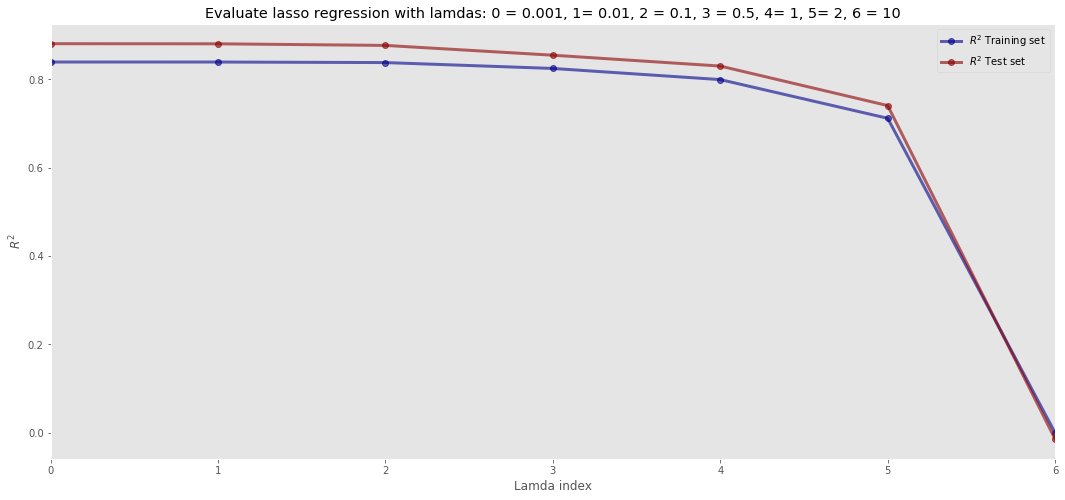

In [17]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

### a6) Identifiy best lambda and coefficients

In [18]:
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    88.105773
lambda        0.001000
Name: 0, dtype: float64

In [19]:
# Coefficients of best model
reg_best = Lasso(alpha = 0.1)
reg_best.fit(X_train, y_train)
reg_best.coef_

array([-0.35554113, -1.13104696, -0.00596296, -3.31741775, -0.        ,
        0.37914648,  0.74902885])

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, reg_best.predict(X_test))

3.586249592807347

### a7) Cross Validation

In [21]:
l_min = 0.05
l_max = 0.2
l_num = 20
lambdas = np.linspace(l_min,l_max, l_num)

train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

pred_num = X.shape[1]
coeff_a = np.zeros((l_num, pred_num))

In [22]:
from sklearn.model_selection import cross_val_score

for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)
    results = cross_val_score(reg, X, y, cv=5, scoring="r2") 

    train_r_squared[ind] = reg.score(X_train, y_train)    
    test_r_squared[ind] = reg.score(X_test, y_test)

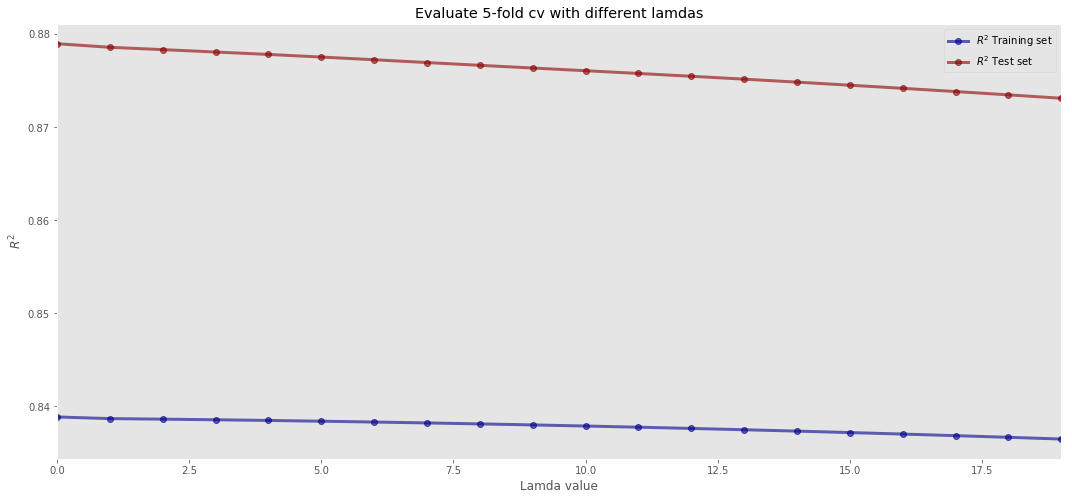

In [23]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda value'); plt.ylabel(r'$R^2$')
plt.xlim(0, 19)
plt.title(r'Evaluate 5-fold cv with different lamdas')
plt.legend(loc='best')
plt.grid()

In [24]:
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    87.897525
lambda        0.050000
Name: 0, dtype: float64

In [25]:
# Best Model
reg_best = Lasso(alpha = 0.144737)
reg_best.fit(X_train, y_train)

Lasso(alpha=0.144737, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [26]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, reg_best.predict(X_test))

3.635187490993961

In [27]:
reg_best.coef_

array([-0.34136411, -1.18223273, -0.        , -3.27132984,  0.        ,
        0.33262331,  0.71385488])

---
---